In [28]:
!pip install pandas
!pip install numpy
!pip install matplotlib.pyplot
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv('clean_data.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


C:\Users\adibs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


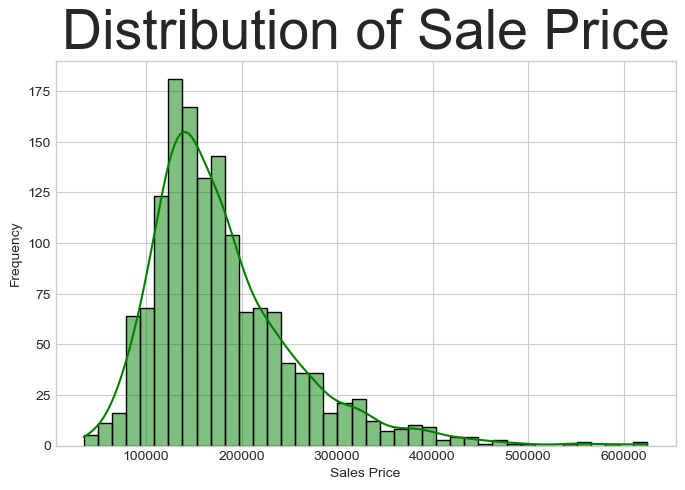

Skewness: 1.5659592925562151


In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], bins=40, kde=True, color='green')
plt.title("Distribution of Sale Price", fontsize=40)
plt.xlabel("Sales Price")
plt.ylabel("Frequency")
plt.show()
print("Skewness:", df['SalePrice'].skew())

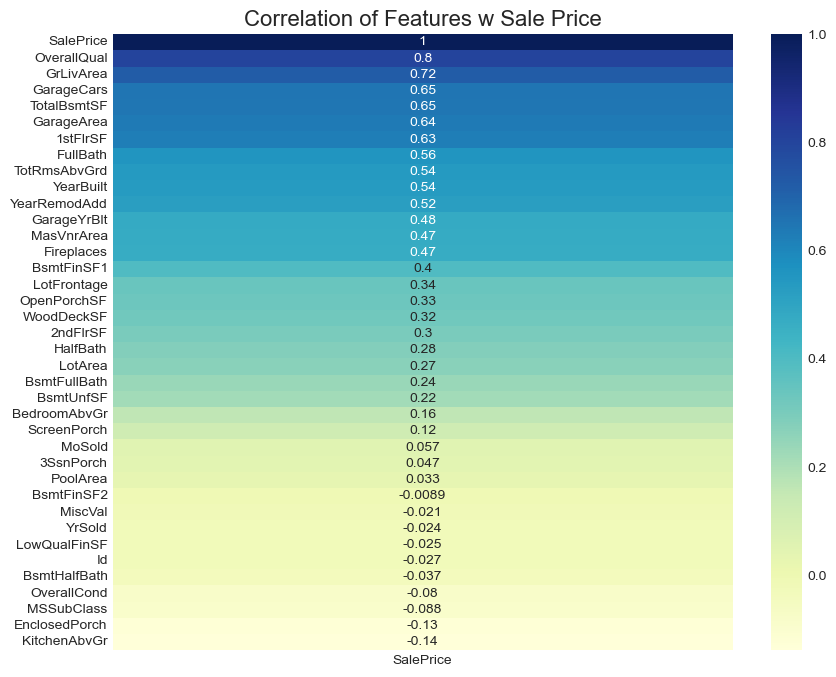

In [14]:
plt.figure(figsize = (10, 8))
corr = df.corr(numeric_only = True)
sns.heatmap(corr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False), annot = True, cmap = 'YlGnBu')
plt.title("Correlation of Features w Sale Price", fontsize = 16)
plt.show()

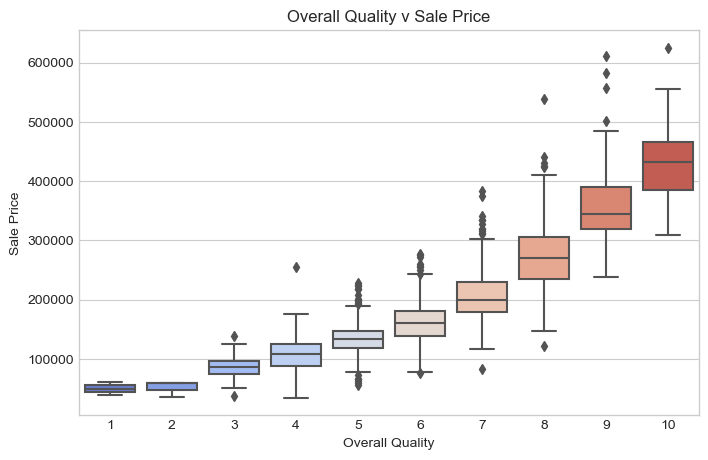

In [16]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df, palette = 'coolwarm')
plt.title("Overall Quality v Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

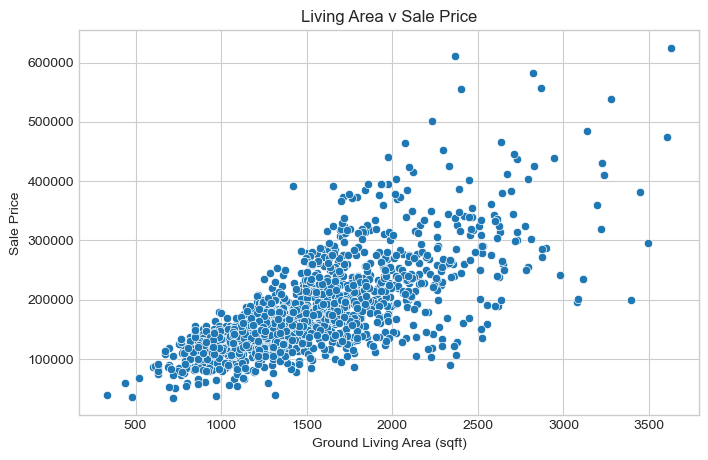

In [18]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df)
plt.title("Living Area v Sale Price")
plt.xlabel("Ground Living Area (sqft)")
plt.ylabel("Sale Price")
plt.show()

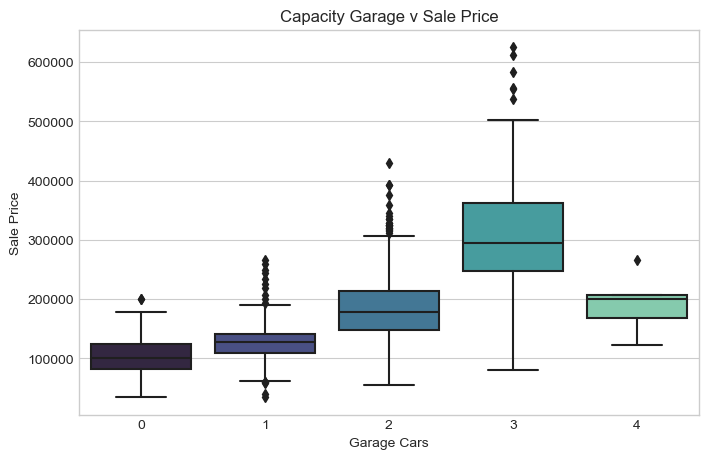

In [20]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = df, palette = 'mako')
plt.title("Capacity Garage v Sale Price")
plt.xlabel("Garage Cars")
plt.ylabel("Sale Price")
plt.show()

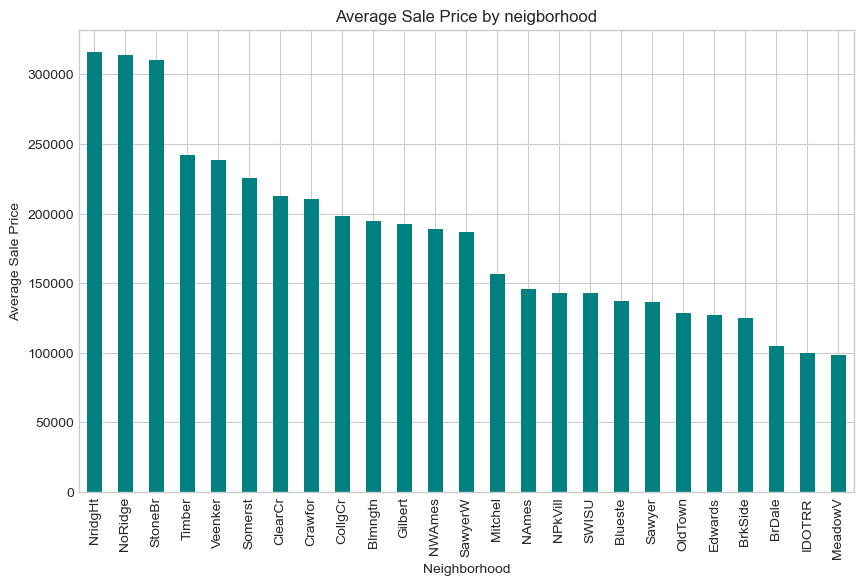

In [22]:
neighborhood_prices = df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending = False)
plt.figure(figsize = (10, 6))
neighborhood_prices.plot(kind = 'bar', color = 'teal')
plt.title("Average Sale Price by neigborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")
plt.xticks(rotation = 90)
plt.show()


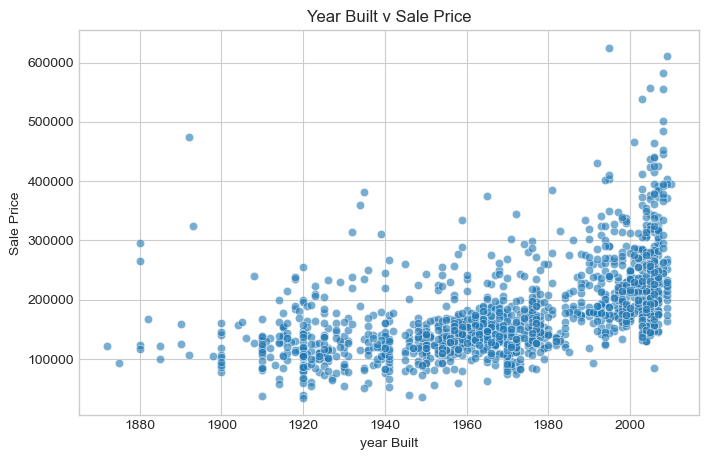

In [24]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = 'YearBuilt', y = 'SalePrice', data = df, alpha = 0.6)
plt.title("Year Built v Sale Price")
plt.xlabel("year Built")
plt.ylabel("Sale Price")
plt.show()

In [26]:
### export summary 
summary = df.groupby(['Neighborhood', 'OverallQual'])['SalePrice'].mean().reset_index()
summary.to_csv('visualization.csv', index = False)
print("Summary file saved for visualization")

Summary file saved for visualization


### Phase 3 Summary - EDA
- Explored target distribution n feature correlation
- Found 'OverallQual', 'GrLivArea', n 'GarageCars' as strongest predictors
- Visualised patterns between quality, living area, price
- Identified location-based pricing differences across neighborhood
- Exported summarized data for PowerBI purposes
